In [ ]:
### Plot 
### Define decoder: K = ()

In [185]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [188]:
import seaborn
seaborn.set(font='Arial',context='talk',font_scale=1.2, style='white')

In [189]:
### Generate data from MVN dist with mean = (2, 1), cov = (1, 2; 2, .5)
mean = np.array([2, 1])
cov = np.array([[10, 1], [1, .5]])
data = scipy.stats.multivariate_normal.rvs(mean=mean, cov=cov, size = 1000)

In [196]:
#### Check the mean and cov ###
print(np.mean(data, axis=0))
print(np.cov(data.T))

[2.02445368 1.01073799]
[[9.5906021  0.97636611]
 [0.97636611 0.52369638]]


In [191]:
### For a given "readout", i.e. KX = 2., what's the most likely data point? 
mn_v = mean[:, np.newaxis]
MU = [mn_v, np.dot(K, mn_v)]
COV = [[cov, (np.dot(K, cov)[np.newaxis, :]).T], [np.dot(K, cov)[np.newaxis, :], np.array([[np.dot(K, np.dot(cov, K.T))]])]]

In [192]:
def return_mvn(mu, cov, mu2_obs):
    '''
    conditional mean / cov given mu2 obs; 
    '''
    mu1 = mu[0]; 
    mu2 = mu[1]; 
    cov11 = cov[0][0]; 
    cov12 = cov[0][1]; 
    cov21 = cov[1][0]; 
    cov22 = cov[1][1]; 
    cov22I = np.linalg.inv(cov22)
    
    mu1_2 = mu1 + np.dot(cov12, np.dot(cov22I, mu2_obs - mu2))
    cov1_2 = cov11 - np.dot(cov12, np.dot(cov22I, cov21))
    
    return mu1_2, cov1_2

In [214]:
### Plot the 
mu2_obs = np.array([[-10]])
mu1, _ = return_mvn(MU, COV, mu2_obs)

In [215]:
np.sum(mu1)

-10.000000000000002

<IPython.core.display.Javascript object>


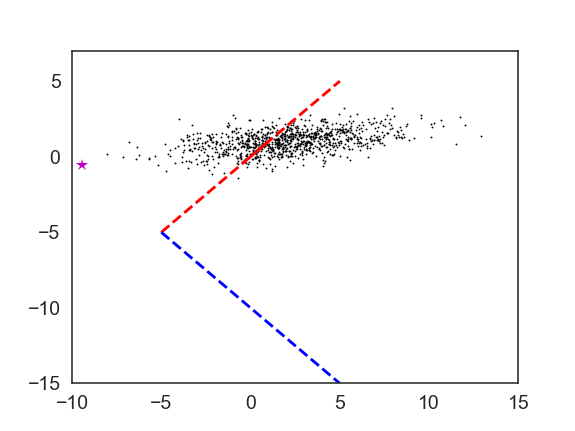

/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <type 'float'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


In [216]:
#### Plot data ###
plt.plot(data[:,0], data[:,1],'k.', markersize=3)
#plt.axis('square')

### Define and plot decoder ### 
K = np.array([1, 1])
plt.plot([0, K[0]], [0, K[1]], 'r-')
plt.plot([-5, K[0]*5], [-5, K[1]*5], 'r--')
plt.ylim([-15, 7])
plt.xlim([-10, 15])

### Plot the place where mu2_obs is 
mu2_obs_float = float(mu2_obs)

### Plot the orthogonal line; 
x_ = np.linspace(-5, 5, 100.)
y_ = 1./K[1]*(mu2_obs_float - x_*K[0])
plt.plot(x_, y_, 'b--')

### Plot the optimal point; 
plt.plot(mu1[0, 0], mu1[1, 0], 'm*', markersize=10)

In [184]:
### For all points in X, see if you 
for i in range(100):
    mu2_obs = np.array([[10*np.random.randn()]])
    mu1, _ = return_mvn(MU, COV, mu2_obs)
    assert(np.allclose(np.dot(K, np.squeeze(mu1)), float(mu2_obs)))
    plt.plot(mu1[0, 0], mu1[1, 0], 'm*')